In [ ]:
import seaborn as sns
import pandas as pd
from google.colab import files
import statsmodels.api as sm
from statsmodels.formula.api import ols
upload = files.upload()

Saving DSFinal.csv to DSFinal.csv


In [ ]:
# DATA PREPARATION

In [ ]:
df = pd.read_csv('DSFinal.csv')
df = df.dropna()
df.head()

,Maker,Genmodel,Genmodel_ID,Adv_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,...,Engine_power,Annual_Tax,Wheelbase,Height,Width,Length,Average_mpg,Top_speed,Seat_num,Door_num
1,Bentley,Arnage,10_1,10_1$$2,2018,6,Grey,2002.0,Saloon,44000,...,450.0,315,3116.0,1515.0,2125.0,5390.0,13.7 mpg,179 mph,5.0,4.0
2,Bentley,Arnage,10_1,10_1$$3,2017,11,Blue,2002.0,Saloon,55000,...,400.0,315,3116.0,1515.0,2125.0,5390.0,14.7 mpg,155 mph,5.0,4.0
5,Bentley,Arnage,10_1,10_1$$6,2017,12,Blue,2002.0,Saloon,55000,...,450.0,315,3116.0,1515.0,2125.0,5390.0,13.7 mpg,179 mph,5.0,4.0
11,Bentley,Arnage,10_1,10_1$$12,2018,6,Silver,2002.0,Saloon,52000,...,450.0,315,3116.0,1515.0,2125.0,5390.0,13.7 mpg,179 mph,5.0,4.0
13,Bentley,Arnage,10_1,10_1$$14,2018,7,Blue,2002.0,Saloon,58000,...,450.0,315,3116.0,1515.0,2125.0,5390.0,13.7 mpg,179 mph,5.0,4.0


In [ ]:
df.columns

Index(['Maker', 'Color', 'Reg_year', 'Bodytype', 'Runned_Miles', 'Engin_size',
       'Gearbox', 'Fuel_type', 'Price', 'Engine_power',
       ...
       'Color_Turquoise', 'Color_White', 'Color_Yellow', 'Fuel_type_Diesel',
       'Fuel_type_Hybrid  Diesel/Electric',
       'Fuel_type_Hybrid  Diesel/Electric Plug-in',
       'Fuel_type_Hybrid  Petrol/Electric',
       'Fuel_type_Hybrid  Petrol/Electric Plug-in', 'Fuel_type_Petrol',
       'Fuel_type_Petrol Ethanol'],
      dtype='object', length=116)

In [ ]:
df.head()

,Maker,Color,Reg_year,Bodytype,Runned_Miles,Engin_size,Gearbox,Fuel_type,Price,Engine_power,...,Color_Turquoise,Color_White,Color_Yellow,Fuel_type_Diesel,Fuel_type_Hybrid Diesel/Electric,Fuel_type_Hybrid Diesel/Electric Plug-in,Fuel_type_Hybrid Petrol/Electric,Fuel_type_Hybrid Petrol/Electric Plug-in,Fuel_type_Petrol,Fuel_type_Petrol Ethanol
1,Bentley,Grey,2002.0,Saloon,44000.0,6.8L,Automatic,Petrol,28750.0,450.0,...,0,0,0,0,0,0,0,0,1,0
2,Bentley,Blue,2002.0,Saloon,55000.0,6.8L,Automatic,Petrol,29999.0,400.0,...,0,0,0,0,0,0,0,0,1,0
5,Bentley,Blue,2002.0,Saloon,55000.0,6.8L,Automatic,Petrol,24950.0,450.0,...,0,0,0,0,0,0,0,0,1,0
11,Bentley,Silver,2002.0,Saloon,52000.0,6.8L,Automatic,Petrol,26990.0,450.0,...,0,0,0,0,0,0,0,0,1,0
13,Bentley,Blue,2002.0,Saloon,58000.0,6.8L,Automatic,Petrol,25950.0,450.0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
del df['Adv_year']

In [ ]:
del df['Adv_month']

In [ ]:
del df['Annual_Tax']

In [ ]:
del df[' Genmodel']

In [ ]:
del df[' Genmodel_ID']

In [ ]:
del df['Adv_ID']

In [ ]:
del df['Fuel_type']

In [ ]:
df.head()

,Maker,Color,Reg_year,Bodytype,Runned_Miles,Engin_size,Gearbox,Fuel_type,Price,Engine_power,Wheelbase,Height,Width,Length,Average_mpg,Top_speed,Seat_num,Door_num
1,Bentley,Grey,2002.0,Saloon,44000,6.8L,Automatic,Petrol,28750.0,450.0,3116.0,1515.0,2125.0,5390.0,13.7 mpg,179 mph,5.0,4.0
2,Bentley,Blue,2002.0,Saloon,55000,6.8L,Automatic,Petrol,29999.0,400.0,3116.0,1515.0,2125.0,5390.0,14.7 mpg,155 mph,5.0,4.0
5,Bentley,Blue,2002.0,Saloon,55000,6.8L,Automatic,Petrol,24950.0,450.0,3116.0,1515.0,2125.0,5390.0,13.7 mpg,179 mph,5.0,4.0
11,Bentley,Silver,2002.0,Saloon,52000,6.8L,Automatic,Petrol,26990.0,450.0,3116.0,1515.0,2125.0,5390.0,13.7 mpg,179 mph,5.0,4.0
13,Bentley,Blue,2002.0,Saloon,58000,6.8L,Automatic,Petrol,25950.0,450.0,3116.0,1515.0,2125.0,5390.0,13.7 mpg,179 mph,5.0,4.0


In [ ]:
# drop rows with non-integer / NaN values

df['Runned_Miles'] = pd.to_numeric(df['Runned_Miles'], errors='coerce')
df = df.dropna(subset=['Runned_Miles'], how='any', axis=0)

In [ ]:
# turn average mpg from string to int
for index, value in df['Average_mpg'].items():
      numeric_part = float(value.split()[0])
      df.at[index, 'Average_mpg'] = numeric_part

In [ ]:
#T-Test

import pandas as pd
import scipy.stats

fits = df[df["Bodytype"] == "Convertible"]
nonfits = df[df["Bodytype"] != "Convertible"]
_, p = scipy.stats.ttest_ind(fits["Price"], nonfits["Price"])
p

3.105354692586579e-194

In [ ]:
maker_dummies = pd.get_dummies(df[['Maker']], drop_first = True, dtype=int)

In [ ]:
bodytype_dummies = pd.get_dummies(df[['Bodytype']], drop_first = True, dtype=int)

In [ ]:
gearbox_dummies = pd.get_dummies(df[['Gearbox']], drop_first = True, dtype=int)

In [ ]:
color_dummies = pd.get_dummies(df[['Color']], drop_first = True, dtype=int)

In [ ]:
df = df.join(bodytype_dummies)

In [ ]:
df = df.join(maker_dummies)

In [ ]:
df = df.join(gearbox_dummies)

In [ ]:
df = df.join(color_dummies)

In [ ]:
new = ['Price', 'Bodytype_SUV', 'Bodytype_Hatchback', 'Bodytype_Pickup', 'Reg_year', 'Gearbox_Manual', 'Runned_Miles', 'Average_mpg']
df_new = df[new]
new_corr = df_new.corr()
new_corr

,Price,Bodytype_SUV,Bodytype_Hatchback,Bodytype_Pickup,Reg_year,Gearbox_Manual,Runned_Miles,Average_mpg
Price,1.000000,0.203825,-0.285280,0.051316,0.404850,-0.396513,-0.360359,-0.169442
Bodytype_SUV,0.203825,1.000000,-0.473505,-0.033631,0.169137,-0.220183,-0.086376,-0.180138
Bodytype_Hatchback,-0.285280,-0.473505,1.000000,-0.050808,-0.072884,0.337424,-0.013222,0.285739
Bodytype_Pickup,0.051316,-0.033631,-0.050808,1.000000,0.069937,-0.023675,-0.060849,-0.055002
Reg_year,0.404850,0.169137,-0.072884,0.069937,1.000000,-0.119035,-0.714763,0.455477
Gearbox_Manual,-0.396513,-0.220183,0.337424,-0.023675,-0.119035,1.000000,0.093935,0.291384
Runned_Miles,-0.360359,-0.086376,-0.013222,-0.060849,-0.714763,0.093935,1.000000,-0.270221
Average_mpg,-0.169442,-0.180138,0.285739,-0.055002,0.455477,0.291384,-0.270221,1.000000


<Axes: >

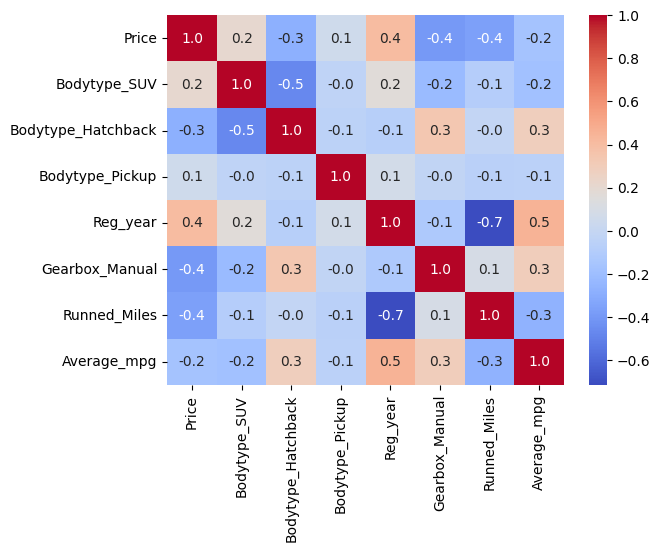

In [ ]:
sns.heatmap(new_corr, annot = True, cmap = 'coolwarm', fmt = ".01f")

In [ ]:
# variables with strongest pos or neg correlation
corr_matrix = df[['Gearbox_Manual','Bodytype_Coupe', 'Bodytype_Hatchback', 'Bodytype_SUV', 'Bodytype_Pickup', 'Reg_year']].corrwith(df['Price'])
corr_matrix

Gearbox_Manual       -0.396513
Bodytype_Coupe        0.228170
Bodytype_Hatchback   -0.285280
Bodytype_SUV          0.203825
Bodytype_Pickup       0.051316
Reg_year              0.404850
dtype: float64

In [ ]:
new_corr_matrix = df[['Reg_year', 'Gearbox_Manual','Bodytype_Coupe', 'Bodytype_Hatchback', 'Bodytype_SUV', 'Bodytype_Pickup', 'Engine_power', 'Wheelbase', 'Height', 'Width', 'Length']].corrwith(df['Price'])
new_corr_matrix

Reg_year              0.404850
Gearbox_Manual       -0.396513
Bodytype_Coupe        0.228170
Bodytype_Hatchback   -0.285280
Bodytype_SUV          0.203825
Bodytype_Pickup       0.051316
Engine_power          0.686208
Wheelbase             0.127981
Height                0.019970
Width                 0.348240
Length                0.349093
dtype: float64

In [ ]:
# linear regression test 1
import statsmodels.api as sm
from statsmodels.formula.api import ols

X = df[['Reg_year']]
Xfull = sm.add_constant(X)
y = pd.DataFrame(df['Price'])

model = sm.OLS(y, Xfull).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                 3.685e+04
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        20:16:55   Log-Likelihood:            -2.0885e+06
No. Observations:              188003   AIC:                         4.177e+06
Df Residuals:                  188001   BIC:                         4.177e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.348e+06   1.75e+04   -191.250      0.000   -3.38e+06   -3.31e+06
Reg_year    1669.9552      8.699    191.976      0.000    1652.906    1687.005
==============================================================================
Omnibus:                   392019.746   Durbin-Watson:                   0.501
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      11237293138.079
Skew:                          17.070   Prob(JB):                         0.00
Kurtosis:                    1200.230   Cond. No.                     9.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# linear regression test 2
import statsmodels.api as sm
from statsmodels.formula.api import ols

X = df[['Engine_power']]
Xfull = sm.add_constant(X)
y = pd.DataFrame(df['Price'])

model = sm.OLS(y, Xfull).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                 1.673e+05
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        22:16:24   Log-Likelihood:            -2.0455e+06
No. Observations:              188003   AIC:                         4.091e+06
Df Residuals:                  188001   BIC:                         4.091e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9059.3708     60.883   -148.799      0.000   -9178.701   -8940.041
Engine_power   146.4520      0.358    409.034      0.000     145.750     147.154
==============================================================================
Omnibus:                   437342.621   Durbin-Watson:                   1.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      44462189793.497
Skew:                          21.948   Prob(JB):                         0.00
Kurtosis:                    2385.017   Cond. No.                         349.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# multiple regression test 1
X = df[['Reg_year', 'Gearbox_Manual', 'Bodytype_Coupe', 'Bodytype_Hatchback', 'Bodytype_SUV', 'Bodytype_Pickup']]
Xfull = sm.add_constant(X)
y = pd.DataFrame(df['Price'])

model = sm.OLS(y, Xfull).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                 1.618e+04
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        22:19:55   Log-Likelihood:            -2.0662e+06
No. Observations:              188003   AIC:                         4.132e+06
Df Residuals:                  187996   BIC:                         4.132e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.894e+06   1.59e+04   -182.073      0.000   -2.92e+06   -2.86e+06
Reg_year            1447.7625      7.898    183.305      0.000    1432.282    1463.243
Gearbox_Manual     -1.091e+04     75.161   -145.100      0.000   -1.11e+04   -1.08e+04
Bodytype_Coupe      1.397e+04    147.709     94.567      0.000    1.37e+04    1.43e+04
Bodytype_Hatchback -3144.9786     83.433    -37.695      0.000   -3308.506   -2981.452
Bodytype_SUV        2764.7444     93.693     29.509      0.000    2581.108    2948.381
Bodytype_Pickup     6074.3926    557.105     10.904      0.000    4982.480    7166.305
==============================================================================
Omnibus:                   432237.818   Durbin-Watson:                   0.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      25714775110.901
Skew:                          21.516   Prob(JB):                         0.00
Kurtosis:                    1814.307   Cond. No.                     9.66e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# multiple regressinon test 2 (highest r-sq)
X = df[['Reg_year', 'Engine_power', 'Runned_Miles']]
Xfull = sm.add_constant(X)
y = pd.DataFrame(df['Price'])

model = sm.OLS(y, Xfull).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                 9.540e+04
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        20:05:50   Log-Likelihood:            -2.0184e+06
No. Observations:              188003   AIC:                         4.037e+06
Df Residuals:                  187999   BIC:                         4.037e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.016e+06   1.73e+04   -116.559      0.000   -2.05e+06   -1.98e+06
Reg_year       999.4416      8.582    116.460      0.000     982.621    1016.262
Engine_power   140.3355      0.311    451.206      0.000     139.726     140.945
Runned_Miles    -0.0620      0.001    -72.473      0.000      -0.064      -0.060
==============================================================================
Omnibus:                   515109.041   Durbin-Watson:                   0.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     138901110047.971
Skew:                          33.564   Prob(JB):                         0.00
Kurtosis:                    4213.376   Cond. No.                     4.48e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.48e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# k-nearest neighbors test 1 (just engine power)
from sklearn.neighbors import KNeighborsClassifier
EnginePower_reshaped = df.Engine_power.values.reshape(-1,1)
nbrs = KNeighborsClassifier(n_neighbors=3).fit(EnginePower_reshaped, df['Price'])

nbrs.score(EnginePower_reshaped, df['Price'])

0.005319064057488445

In [ ]:
# k-nearest neighbors test 2 (3 most predictive features from regression r-sq)
from sklearn.neighbors import KNeighborsClassifier
test_df = pd.DataFrame(df[['Reg_year', 'Engine_power', 'Runned_Miles']])
nbrs = KNeighborsClassifier(n_neighbors=3).fit(test_df, df['Price'])
nbrs.score(test_df, df['Price'])

0.3327446902443046

In [ ]:
# k-nearest neighbors test 3 (test 2 with 5 neighbors)
from sklearn.neighbors import KNeighborsClassifier
test_df = pd.DataFrame(df[['Reg_year', 'Engine_power', 'Runned_Miles']])
nbrs = KNeighborsClassifier(n_neighbors=5).fit(test_df, df['Price'])
nbrs.score(test_df, df['Price'])

0.20868815923150164

In [ ]:
# k-nearest neighbors test 4 (test 2 with 4 neighbors)
from sklearn.neighbors import KNeighborsClassifier
test_df = pd.DataFrame(df[['Reg_year', 'Engine_power', 'Runned_Miles']])
nbrs = KNeighborsClassifier(n_neighbors=4).fit(test_df, df['Price'])
nbrs.score(test_df, df['Price'])

0.2554959229373999

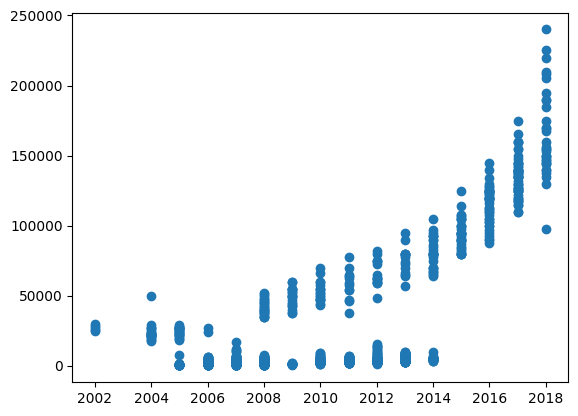

In [ ]:
# reg_year to price scatterplot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

x = df['Reg_year'][:1000]
y = df['Price'][:1000]

plt.plot(x,y,'o')

[8993.27305637]
-18051642.30666919


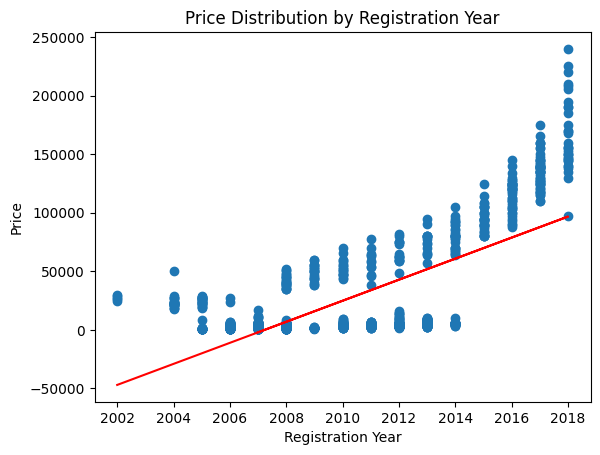

In [ ]:
# same plot with line of best fit (linear regression)

reg_year_model = LinearRegression()
x_reshaped = x.values.reshape(-1,1)
reg_year_model.fit(x_reshaped,y)
y_hat = reg_year_model.predict(x_reshaped)
plt.plot(x,y,'o')
plt.plot(x,y_hat,'r')
plt.title('Price Distribution by Registration Year')
plt.xlabel('Registration Year')
plt.ylabel('Price')

print(reg_year_model.coef_)
print(reg_year_model.intercept_)

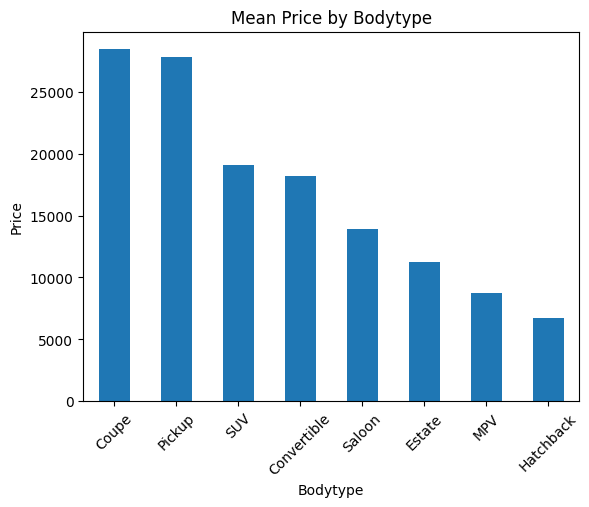

In [ ]:
# mean price by bodytype histogram
import seaborn as sns
import matplotlib.pyplot as plt
bodytype_counts = df['Bodytype'].value_counts()
valid_bodytypes = bodytype_counts[bodytype_counts >= 100].index
df_filtered = df[df['Bodytype'].isin(valid_bodytypes)]
# filter out low entry bodtypes
bodytype_mean_price = df_filtered.groupby('Bodytype')['Price'].mean()
sorted = bodytype_mean_price.sort_values(ascending=False)
sorted.plot(kind='bar')
plt.title('Mean Price by Bodytype')
plt.xlabel('Bodytype')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

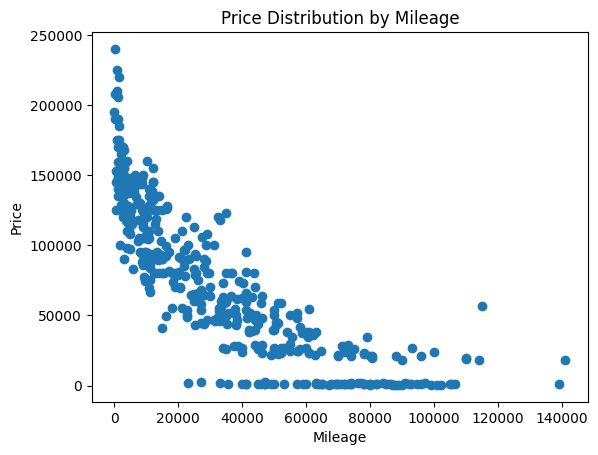

In [ ]:
# price distribution by mileage scatterplot
plt.scatter(x= df['Runned_Miles'][:410], y=df['Price'][:410])
plt.title('Price Distribution by Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

<ipython-input-85-16844e5c23cb>:4: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  violinPlot = sns.violinplot(data=df, x="Price", y="Maker", scale="width", cut=0, inner="quartile")


Text(0, 0.5, 'Maker')

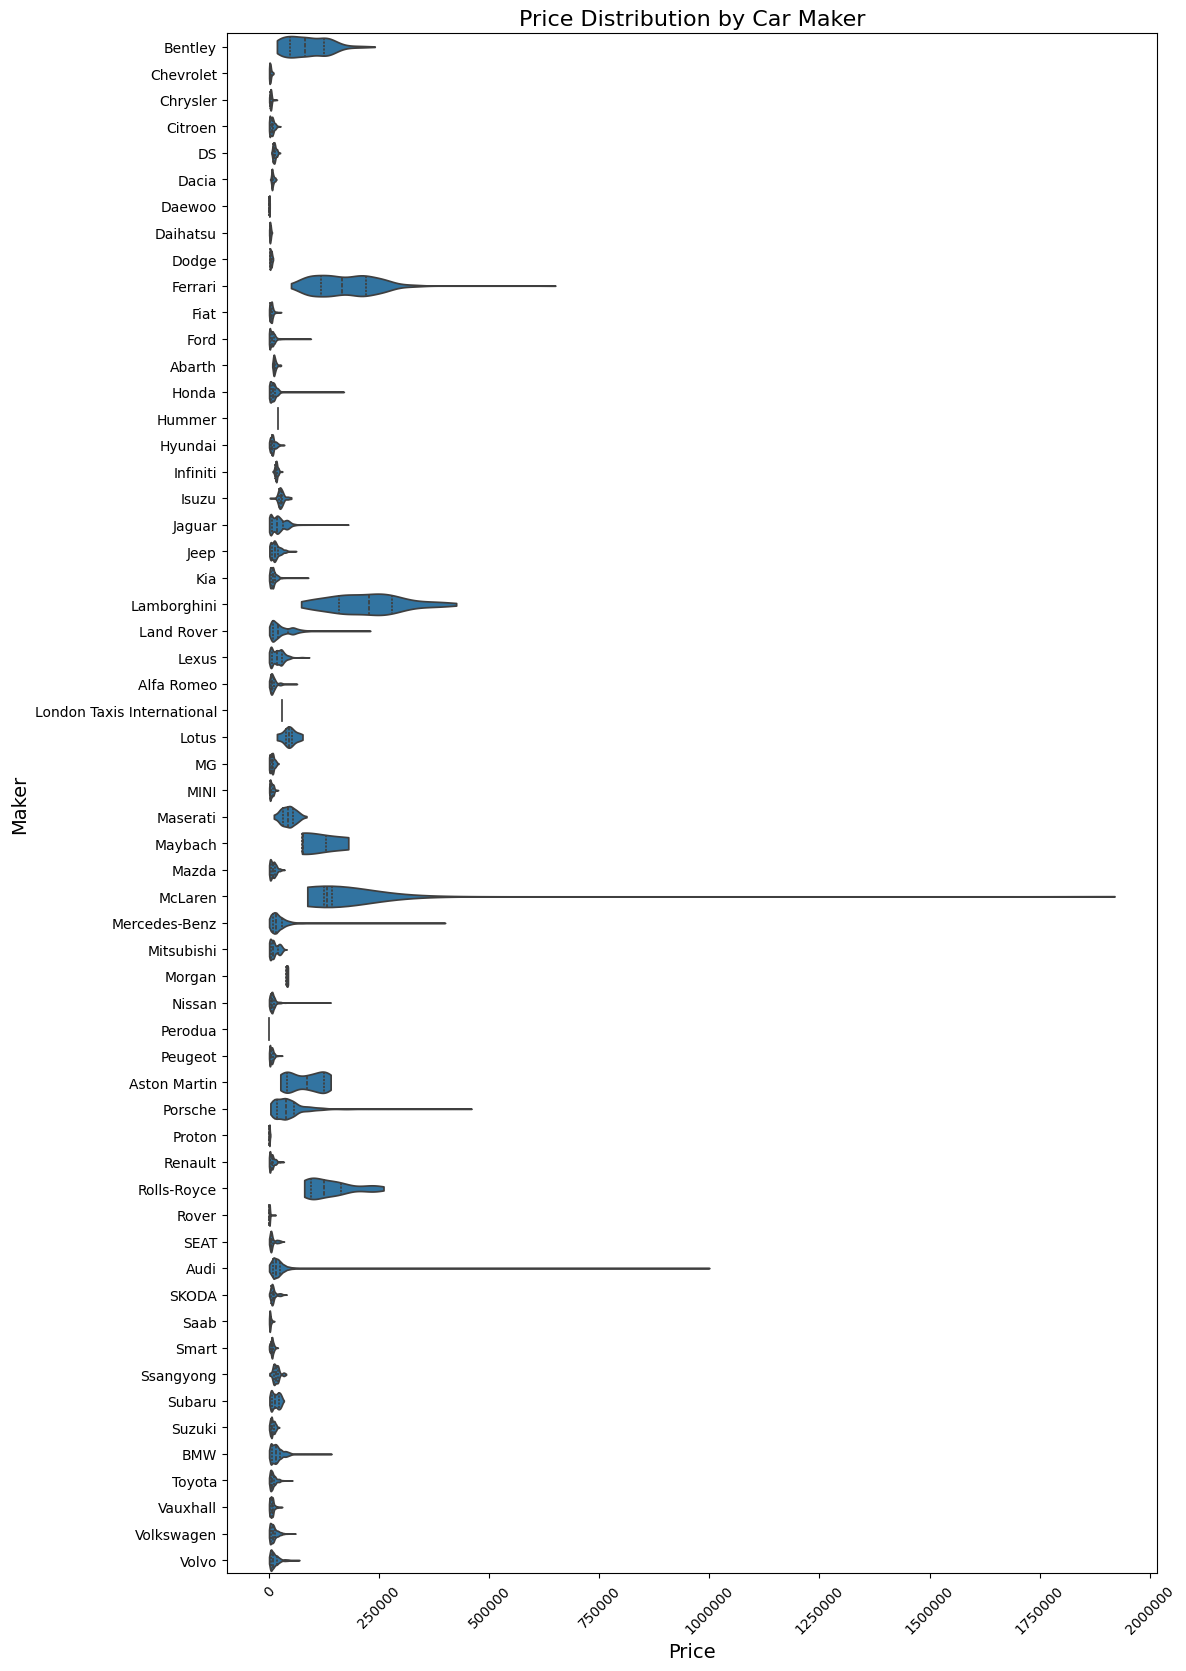

In [ ]:
#Violin Plot (distribution between Price & Maker)

plt.figure(figsize=(12, 20))
violinPlot = sns.violinplot(data=df, x="Price", y="Maker", scale="width", cut=0, inner="quartile")
violinPlot.ticklabel_format(style="plain", axis="x")
plt.xticks(rotation=45)
violinPlot.set_title("Price Distribution by Car Maker", fontsize=16)
violinPlot.set_xlabel("Price", fontsize=14)
violinPlot.set_ylabel("Maker", fontsize=14)

Text(0, 0.5, 'Price')

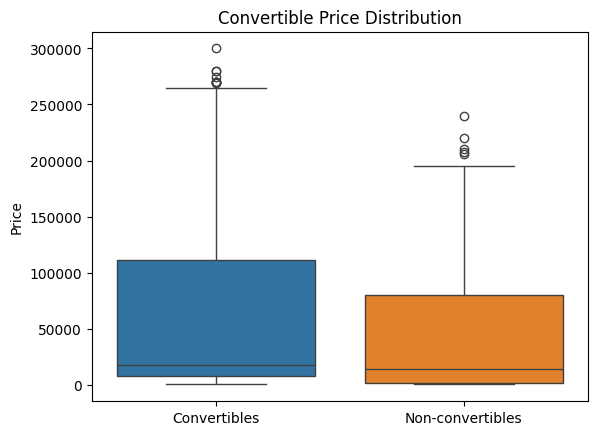

In [ ]:
# box plot of price for convertibles and non-convertibles (t-test)
fits = df[df["Bodytype"] == "Convertible"]
nonfits = df[df["Bodytype"] != "Convertible"]
price_data = pd.concat([fits["Price"][:500], nonfits["Price"][:500]], axis=1, keys=["Convertibles", "Non-convertibles"])
sns.boxplot(data=price_data)
plt.title('Convertible Price Distribution')
plt.ylabel('Price')

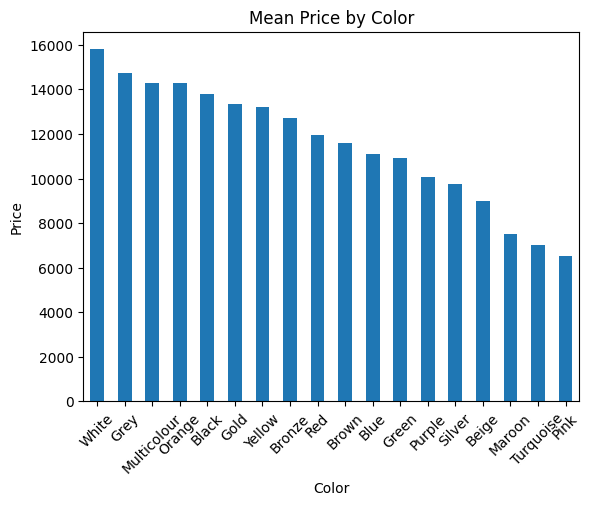

In [ ]:
# mean price by color histogram
bodytype_counts = df['Color'].value_counts()
valid_bodytypes = bodytype_counts[bodytype_counts >= 100].index
df_filtered = df[df['Color'].isin(valid_bodytypes)]
# filter low entry bodtypes that can skew data
bodytype_mean_price = df_filtered.groupby('Color')['Price'].mean()
sorted = bodytype_mean_price.sort_values(ascending=False)
sorted.plot(kind='bar')
plt.title('Mean Price by Color')
plt.xlabel('Color')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()